In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def vid_backround(vid):
    cap = cv2.VideoCapture(vid)
    # we will randomly select 50 frames for the calculating the median
    frame_indices = cap.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=50)
    # we will store the frames in array
    frames = []
    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        frames.append(frame)
    median_frame = np.median(frames, axis=0).astype(np.uint8)
    return median_frame
bg = vid_backround('Video_2022_08_18_20_25_15-2022_08_18_20_31_40.avi')

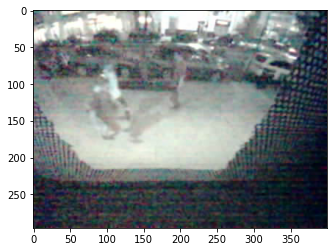

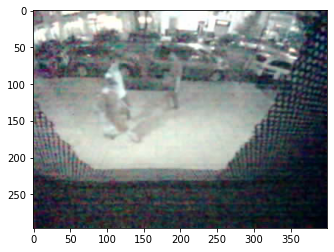

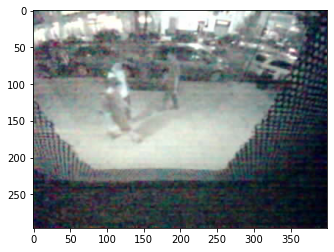

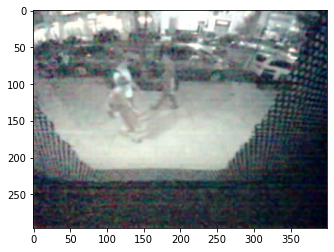

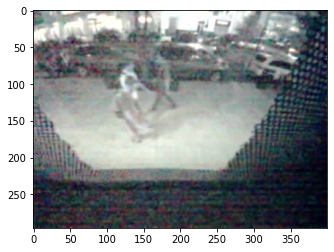

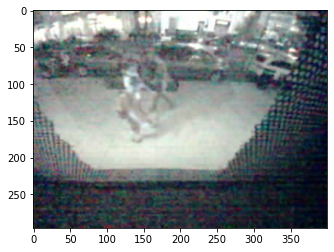

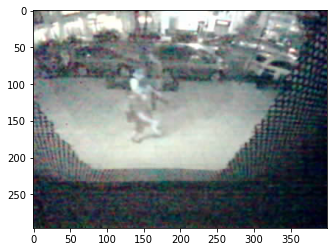

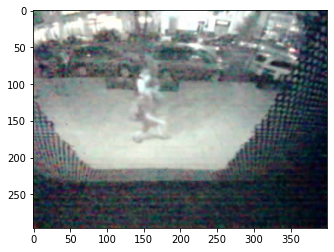

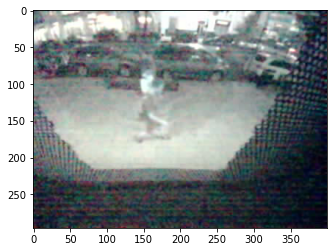

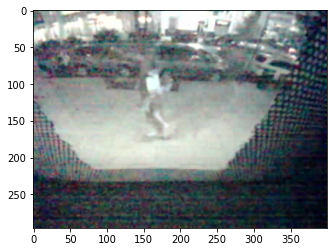

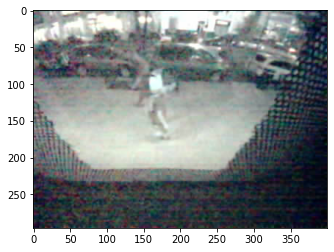

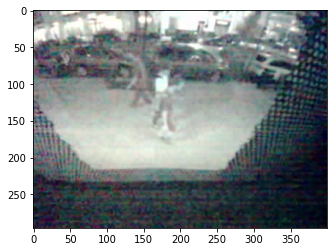

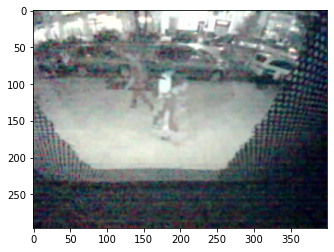

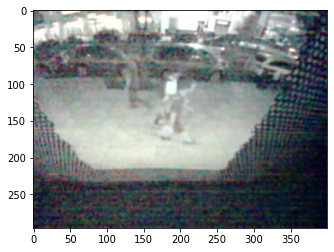

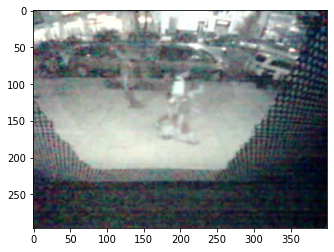

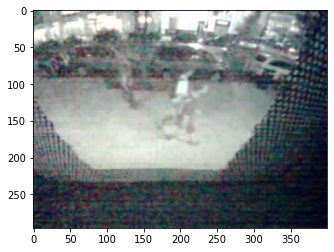

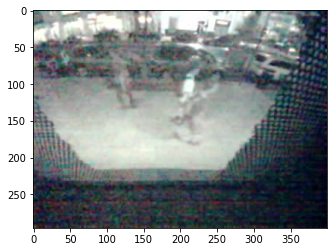

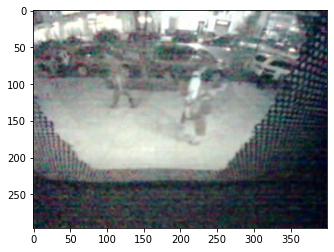

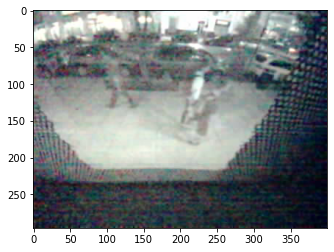

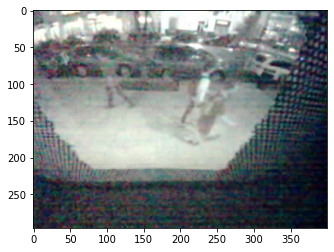

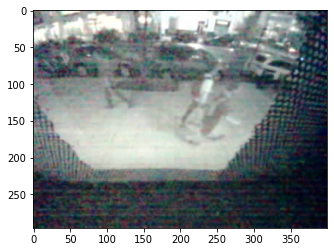

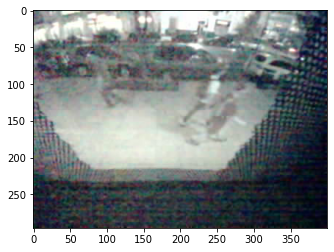

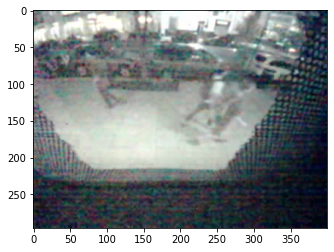

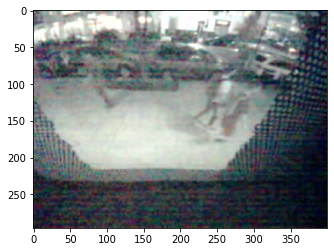

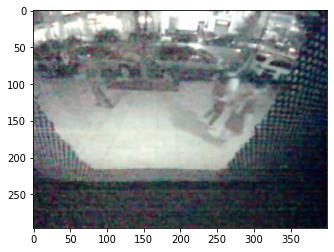

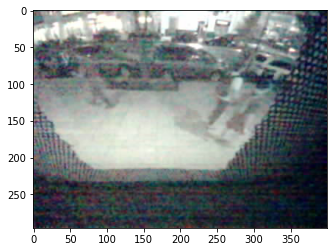

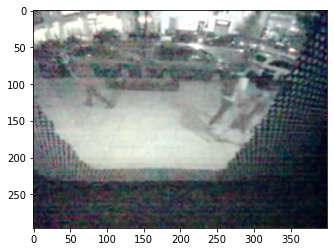

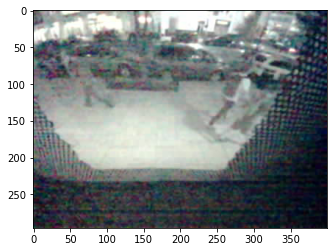

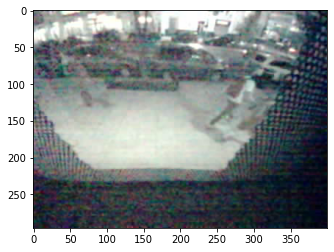

In [18]:
def vid_back_blur(vid , background):
  bg = background
  capture1 = cv2.VideoCapture(vid)
  counter = 0
  tot=0
  center = bg.shape
  w=200
  h=200
  x = center[1]/2 - w/2
  y = center[0]/2 - h/2
  bg= cv2.cvtColor(bg, cv2.COLOR_BGR2GRAY)
  bg = bg/255
  
  bg = bg[int(y):int(y+h), int(x):int(x+w)]
  try:
    while capture1.isOpened():
      
        ret1, frame1 = capture1.read()
        tf = frame1
        frame1= cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
        frame1 = cv2.medianBlur(frame1,3)
        nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(frame1, connectivity=8)
        # sizes = stats[1:, -1]
        # nb_components = nb_components - 1

        # # your answer image
        # img2 = frame1
        # # for every component in the image, you keep it only if it's above min_size
        # for i in range(0, nb_components):
        #     if sizes[i] < 150:
        #         img2[output == i + 1] = 0
        # plt.imshow(img2,cmap='gray')
        # plt.show()
        # counter+=1
        frame1=frame1/255
        frame1 = frame1[int(y):int(y+h), int(x):int(x+w)]
        temp = bg-frame1
        temp=np.where( temp>0.15 ,1,0)
        tot+=1
        
        # print("BACKGROUND",np.sum(bg))
        if np.count_nonzero(temp)>200 :
          # print(np.count_nonzero(temp)
          # plt.imshow(tf,cmap='gray')
          # plt.show()
          cv2.imwrite("E:\\D drive\\CV project\\Low-Res-Video-Vision-Project\\extract1\\img_"+str(counter)+".jpg", tf)
          counter+=1
        if counter==60:
          break
  except:
    print(counter,tot)
      
  capture1.release()
  # print(max(lst), sum(lst)/len(lst) , min(lst) , np.sum(bg))
vid_back_blur('Video_2022_08_18_20_25_15-2022_08_18_20_31_40.avi'  , bg)